In [1]:
from typing import Dict , TypedDict
from langgraph.graph import StateGraph,END,START

In [2]:
class Agentstate(TypedDict):
    num1:int
    num2:int
    operation:str
    result:int

In [3]:
def adder(state:Agentstate)->Agentstate:
    """this is the simple add function"""
    state["result"]=state["num1"]+state["num2"]
    return state

In [4]:
def subtraction(state:Agentstate)-> Agentstate:
    """this is the simple fucntion to subtract"""
    state["result"]=state["num1"]-state["num2"]
    return state

In [5]:
def router(state:Agentstate) -> Agentstate:
    """this is the routing function to add condition to the program"""
    if state["operation"] == "-":
        return "subtraction_"
    else :
        return "addition_"

In [6]:
graph = StateGraph(Agentstate)


In [7]:
graph.add_node("addition",adder)
graph.add_node("subtraction",subtraction)
graph.add_node("router",lambda state:state)

graph.add_edge(START,"router")
graph.add_conditional_edges(
    "router",
    router,
    {
        "subtraction_":"subtraction",
        "addition_":"addition"
    }
)
graph.add_edge("addition",END)
graph.add_edge("subtraction",END)
app = graph.compile()

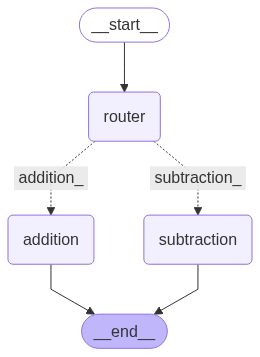

In [8]:
from IPython.display import Image , display 
display(Image(app.get_graph().draw_mermaid_png()))

In [9]:
para=Agentstate(num1=34,num2=54,operation="+")
print(app.invoke(para))

{'num1': 34, 'num2': 54, 'operation': '+', 'result': 88}
